In [8]:
import pandas as pd
import numpy as ny

In [12]:
df_csv = pd.read_csv('housing.csv')

df = pd.read_csv('housing.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Findinf Null Values

In [29]:
Null_values = df.isnull().sum()
print(Null_values)

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64


<Axes: >

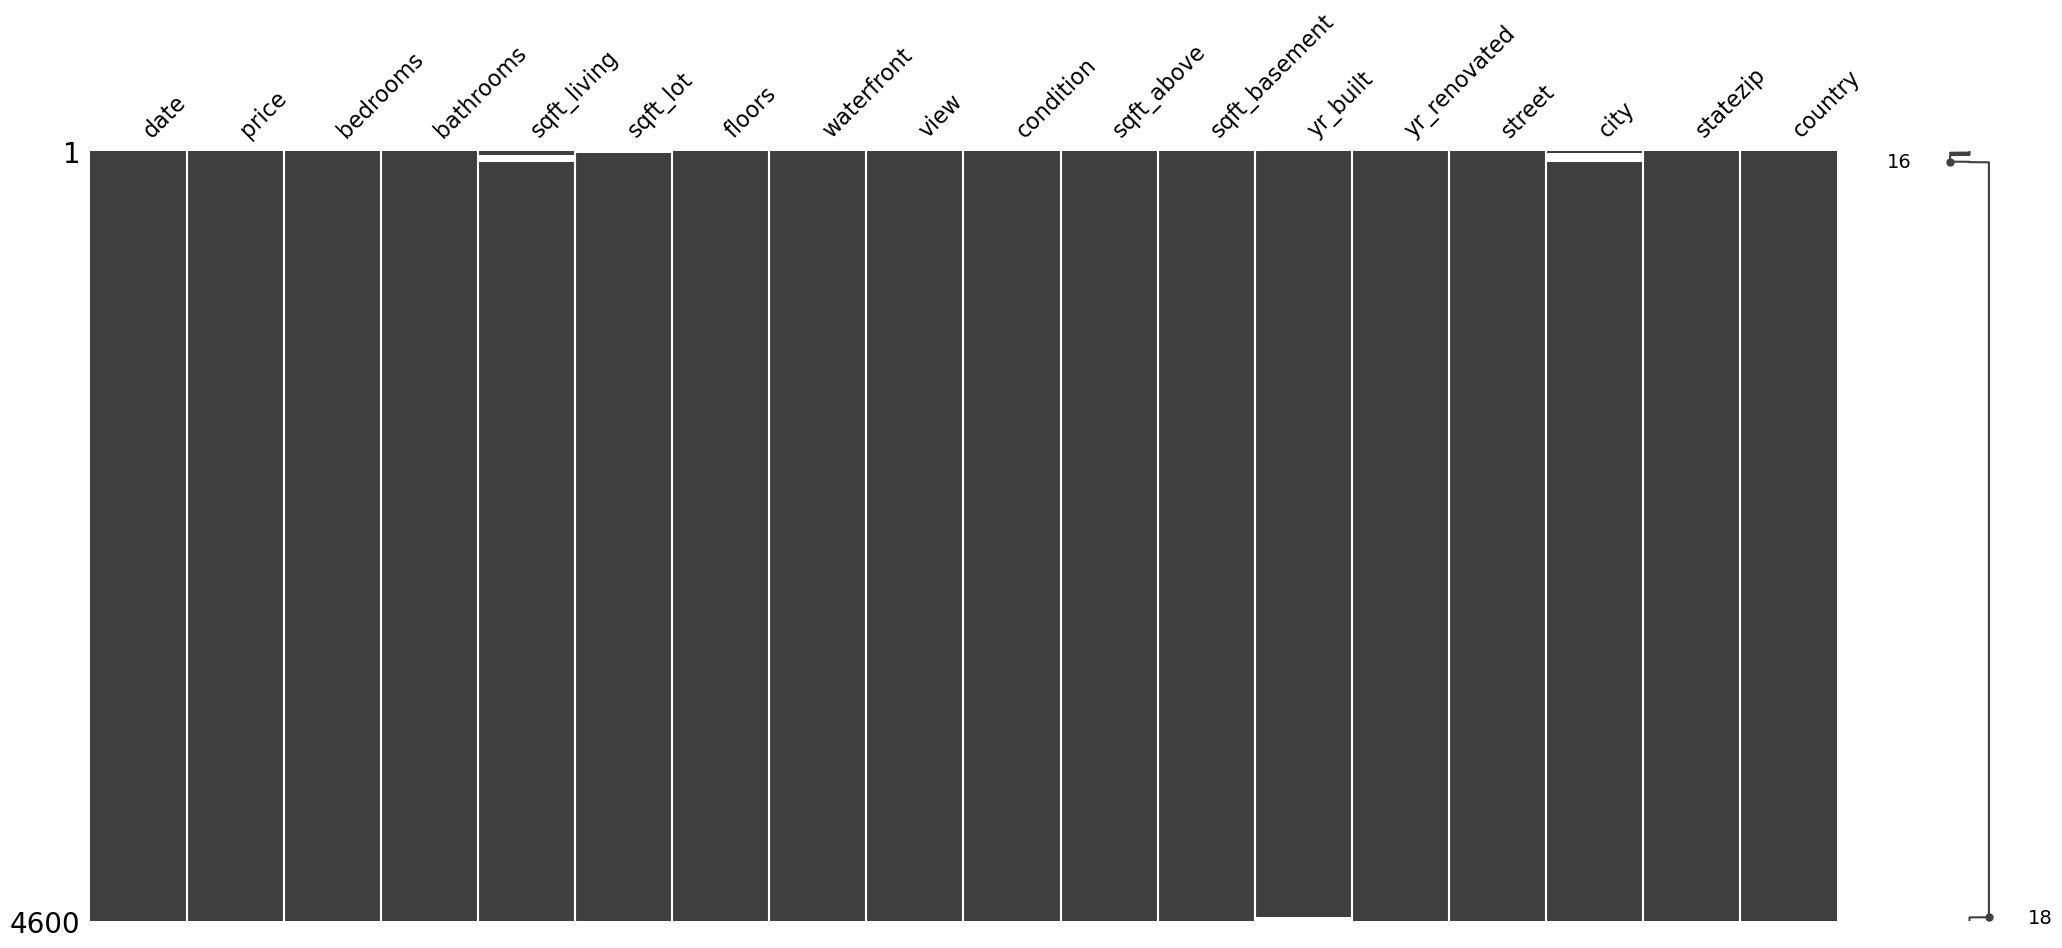

In [27]:
import missingno as msno
msno.matrix(df)

# Drop null Values

In [63]:
df_drop = df.drop(columns = ['sqft_living','sqft_lot'])
print(df_drop)

                 date        price  bedrooms  bathrooms  floors  waterfront  \
67    03/05/2014 0:00   310000.000         3       1.00     1.0           0   
68    04/05/2014 0:00   775000.000         2       2.50     1.0           0   
69    04/05/2014 0:00   365000.000         3       2.50     1.0           0   
70    04/05/2014 0:00   331950.000         4       2.50     2.0           0   
71    04/05/2014 0:00   783500.000         3       2.50     2.0           0   
...               ...          ...       ...        ...     ...         ...   
4572  02/07/2014 0:00  1288333.333         6       4.50     3.0           0   
4573  02/07/2014 0:00   584000.000         3       1.75     2.0           0   
4574  02/07/2014 0:00        0.000         3       1.00     1.0           0   
4575  02/07/2014 0:00        0.000         5       6.25     2.0           0   
4576  02/07/2014 0:00   245000.000         3       3.00     2.0           0   

      view  condition  sqft_above  sqft_basement  y

# Drop NA values in Year of build

In [67]:
df_Clean = df_drop.dropna(subset=['yr_built','city'])
print(df_Clean)

                 date        price  bedrooms  bathrooms  floors  waterfront  \
67    03/05/2014 0:00   310000.000         3       1.00     1.0           0   
68    04/05/2014 0:00   775000.000         2       2.50     1.0           0   
69    04/05/2014 0:00   365000.000         3       2.50     1.0           0   
70    04/05/2014 0:00   331950.000         4       2.50     2.0           0   
71    04/05/2014 0:00   783500.000         3       2.50     2.0           0   
...               ...          ...       ...        ...     ...         ...   
4572  02/07/2014 0:00  1288333.333         6       4.50     3.0           0   
4573  02/07/2014 0:00   584000.000         3       1.75     2.0           0   
4574  02/07/2014 0:00        0.000         3       1.00     1.0           0   
4575  02/07/2014 0:00        0.000         5       6.25     2.0           0   
4576  02/07/2014 0:00   245000.000         3       3.00     2.0           0   

      view  condition  sqft_above  sqft_basement  y

In [79]:
Summary_stats = df_Clean[['price','sqft_above','bedrooms','bathrooms']].describe()
print(Summary_stats)

              price    sqft_above     bedrooms    bathrooms
count  4.510000e+03   4510.000000  4510.000000  4510.000000
mean   5.533226e+05   1842.347894     3.402882     2.162916
std    5.678958e+05    974.815301     0.911590     0.786824
min    0.000000e+00    350.000000     0.000000     0.000000
25%    3.240000e+05   1190.000000     3.000000     1.750000
50%    4.625000e+05   1590.000000     3.000000     2.250000
75%    6.574000e+05   2302.250000     4.000000     2.500000
max    2.659000e+07  20450.000000     9.000000     8.000000


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

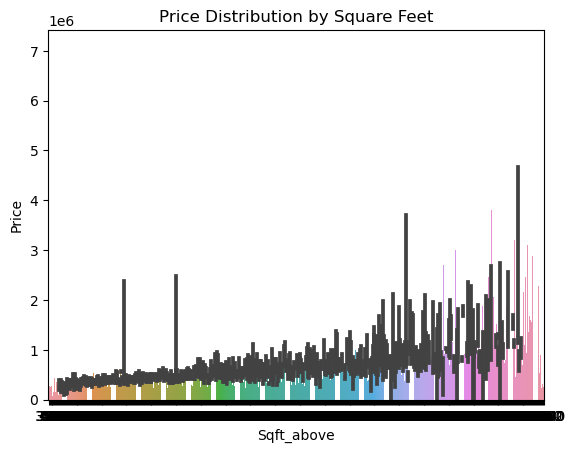

In [101]:
sns.barplot(x='sqft_above', y='price', data=df_Clean)
plt.title('Price Distribution by Square Feet')
plt.xlabel('Sqft_above')
plt.ylabel('Price')
plt.show()

In [105]:
import statsmodels.api as sm

# A simple linear Regression Analysis

In [112]:
X = df_Clean['sqft_above']
y = df_Clean['price']
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     519.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          5.39e-109
Time:                        01:08:54   Log-Likelihood:                -65909.
No. Observations:                4510   AIC:                         1.318e+05
Df Residuals:                    4508   BIC:                         1.318e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.082e+05   1.71e+04     12.159      0.0